In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('data/optiso_out/apc.tsv', sep='\t')
df = df.set_index('seq')
data_arr = df.values
# this really screwed things up
# just trying to delete fitness
#np.delete(data_arr, 7, axis=1)
data_arr

array([[1.23243336e+00, 1.25059293e+00, 4.41201456e-01, ...,
        1.79709822e+00, 2.90000000e+01, 1.43276397e-04],
       [2.64328666e+00, 6.15885938e-01, 3.69632502e-01, ...,
        2.29489595e+00, 6.20000000e+01, 3.00404391e-04],
       [5.85207798e-01, 8.77055163e-01, 5.86937745e-01, ...,
        5.61306191e-01, 4.00000000e+00, 6.69870439e-01],
       ...,
       [9.15627199e-01, 2.65106189e+00, 3.69538732e+00, ...,
        3.45954769e+00, 9.00000000e+00, 7.43111135e-02],
       [1.32885399e+00, 4.51245938e-01, 6.43910122e-01, ...,
        1.49385669e+00, 3.60000000e+01, 1.88994949e-02],
       [3.71417477e+00, 1.66720133e+00, 1.06396228e+00, ...,
        1.23572358e+00, 2.20000000e+01, 8.55181873e-02]])

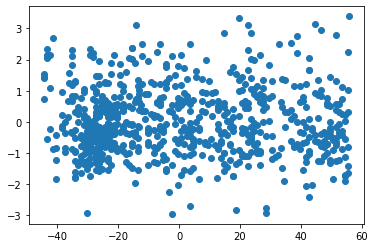

In [3]:
data5 = PCA(n_components=4).fit_transform(data_arr)
# can only show two PC's at a time
plt.scatter(data5[:,0],data5[:,2])

In [4]:
# how does it make 5 clusters out of 4 components?

classifier = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
clusters = classifier.fit_predict(data5)
data5[clusters == 4,0]

array([11.6101292 ,  9.63117845,  8.66638866, 11.62457674,  4.60243957,
        9.61552404,  4.61117885, 10.61143271, 10.62487324,  3.61579706,
       14.61954589,  7.65619917, 15.64119003, 14.65146112, 12.61047196,
       13.64361474, 12.63310414,  5.63167722,  5.63256917, 10.63573692,
        6.58686547, 12.6137997 ,  3.64137631,  7.61628549, 10.63044875,
        3.59876468,  2.63913518, 12.59671721,  4.59393719, 10.60474002,
       12.63883494,  4.60164827,  3.65611223,  4.60708803, 12.62744342,
        8.6486094 ,  4.61315517, 13.62702422,  6.62080648, 13.60528217,
       15.61967478, 14.64152964,  8.62633189,  5.63118848,  6.61141356,
        6.57313047,  7.60877209,  8.60948212, 12.58435369,  3.64076862,
        9.61980854, 14.61719351,  3.61655492,  8.59978787, 12.65089022,
       12.62965516,  2.64242399,  4.60574276, 13.6157734 ,  4.60713136,
        3.61801122,  7.65009409,  7.63799503, 14.63669064,  6.61223801])

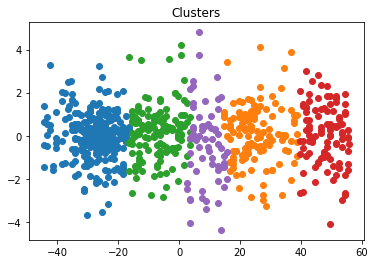

In [5]:
plt.scatter(data5[clusters == 0, 0], data5[clusters == 0, 1], label = 'Type1')
plt.scatter(data5[clusters == 1, 0], data5[clusters == 1, 1], label = 'Type2')
plt.scatter(data5[clusters == 2, 0], data5[clusters == 2, 1], label = 'Type3')
plt.scatter(data5[clusters == 3, 0], data5[clusters == 3, 1], label = 'Type4')
plt.scatter(data5[clusters == 4, 0], data5[clusters == 4, 1], label = 'Type5')

plt.title('Clusters')
plt.show()